# ImmoEliza Data Analysis

## Data Cleaning

### Import Necessary Librairies

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pd.options.mode.chained_assignment = None

### Setting the dataset in a variable called "data"

In [52]:
data = pd.read_json("final_dataset.json")
pd.options.display.max_columns = 35             #just extending the number  of columns that can be seen
pd.options.display.max_colwidth = 120           #just extending the width of columns to be able to click on Url for checking infos
data.shape

(118714, 32)

### Checking  if there is any duplicates

In [53]:
data.drop_duplicates("PropertyId",inplace=True)
data.shape



(118714, 32)

### Seems not let's move on to the next step which  is checking null values

In [54]:
data.isnull().sum()

Url                       0
BathroomCount          9602
BedroomCount              0
ConstructionYear      49816
Country                   0
District                  7
Fireplace            114591
FloodingZone          60372
Furnished             88389
Garden                96211
GardenArea            96211
Kitchen               51580
LivingArea            14175
Locality                  2
MonthlyCharges       105064
NumberOfFacades       41772
PEB                   33640
PostalCode                0
Price                     0
PropertyId                0
Province                  7
Region                    7
RoomCount             85798
ShowerCount           61587
StateOfBuilding       37092
SubtypeOfProperty         0
SurfaceOfPlot         60477
SwimmingPool          78356
Terrace               50370
ToiletCount           22273
TypeOfProperty            0
TypeOfSale                0
dtype: int64

### Get rid of null values when possible

In [55]:
data.update(data[["BathroomCount","Fireplace","Furnished","Garden","GardenArea","SwimmingPool","Terrace","ToiletCount"]].fillna(0))
data.shape

(118714, 32)

### Get rid of potentials encoding errors

In [56]:
data.drop(data[data.BathroomCount > data.BedroomCount].index,inplace=True)
data.drop(data[data.ConstructionYear > 2033].index,inplace=True)
data.drop(data[data.GardenArea > data.SurfaceOfPlot].index,inplace=True)
data.drop(data[data.PostalCode < 1000].index,inplace=True)
data.drop(data[data.NumberOfFacades > 4].index,inplace=True)
data.drop(data[data.Price > 15000000].index,inplace=True)
data.drop(data[data.ToiletCount > 58].index,inplace=True)
data.drop(data[data.ShowerCount > 58].index,inplace=True)
data.drop(data[data.TypeOfSale == "annuity_monthly_amount"].index,inplace=True)
data.drop(data[data.TypeOfSale == "annuity_without_lump_sum"].index,inplace=True)
data.drop(data[data.TypeOfSale == "annuity_lump_sum"].index,inplace=True)


data.shape

(114529, 32)

### Super looks like we deleted more than 4000 errors. Great!

### Separate sale data and rent data to express more things

In [57]:
sale_data = data[data.TypeOfSale == "residential_sale"]
rent_data = data[data.TypeOfSale == "residential_monthly_rent"]
print(sale_data.shape)
print(rent_data.shape)

(101817, 32)
(12712, 32)


## Data Analysis

### See how many rows and columns we have

In [58]:
print(sale_data.shape)
print(rent_data.shape)

(101817, 32)
(12712, 32)


### See correlation between price and place

#### price/region

In [59]:
price_sale_region = sale_data.groupby("Region", as_index=False)[["Price"]].mean().round()
price_rent_region = rent_data.groupby("Region", as_index=False)[["Price"]].mean().round()

In [60]:
fig = go.Figure()
colors = px.colors.qualitative.Vivid
fig.add_trace(
    go.Bar(
        x=price_sale_region['Region'],
        y=price_sale_region['Price'],
        name='Sale',
        offsetgroup=1,
        marker=dict(
            color=colors[0]
        )
    )
)
fig.add_trace(
    go.Bar(
        x=price_rent_region['Region'],
        y=price_rent_region['Price'],
        name='Rent',
        yaxis='y2',
        offsetgroup=2,
        marker=dict(
            color=colors[1]
        )
    )
)
fig.update_traces(
    hovertemplate='<b>%{y:,.0f} €</b>'
)
buttons=[
    dict(
        label="Rent",
        method="update",
        args=[{},dict(
            xaxis=dict(
                categoryarray=price_rent_region['Region']
            )   
        )]
    ),
    dict(
        label="Sale",
        method="update",
        args=[{},dict(
            xaxis=dict(
                categoryarray=price_sale_region['Region']
            )   
        )]
    )
]
fig.update_layout(
    title='Average price per region',
    width = 800,
    updatemenus=[dict(
        buttons=buttons
    )],
    legend=dict(
        x=0.5,
        y=1.1,
        orientation='h',
        xanchor='center'
    ),
    yaxis=dict(
        gridcolor=colors[0],
        color=colors[0],
        title='Sale price in €'
    ),
    yaxis2=dict(
        overlaying='y',
        side='right',
        gridcolor=colors[1],
        color=colors[1],
        title='Monthly rent in €'
    ),
        xaxis=dict(
        categoryorder='array',
    ),
    bargap=0.1,
    bargroupgap=0.05,
    hovermode='x unified',
)
fig.show()

#### price/province

In [61]:
price_sale_province = sale_data.groupby("Province", as_index=False)[["Price"]].mean().round().sort_values("Price",ascending=False)
price_rent_province = rent_data.groupby("Province", as_index=False)[["Price"]].mean().round().sort_values("Price",ascending=False)

In [62]:
fig = go.Figure()
colors = px.colors.qualitative.Vivid
fig.add_trace(
    go.Bar(
        x=price_sale_province['Province'],
        y=price_sale_province['Price'],
        name='Sale',
        offsetgroup=1,
        marker=dict(
            color=colors[0]
        )
    )
)
fig.add_trace(
    go.Bar(
        x=price_rent_province['Province'],
        y=price_rent_province['Price'],
        name='Rent',
        yaxis='y2',
        offsetgroup=2,
        marker=dict(
            color=colors[1]
        )
    )
)
fig.update_traces(
    hovertemplate='<b>%{y:,.0f} €</b>',   
)
buttons=[
    dict(
        label="Sale",
        method="update",
        args=[{},dict(
            xaxis=dict(
                categoryarray=price_sale_province['Province']
            )   
        )]
    ),
    dict(
        label="Rent",
        method="update",
        args=[{},dict(
            xaxis=dict(
                categoryarray=price_rent_province['Province']
            )   
        )]
    )
]
fig.update_layout(
    title='Average price per province',
    width = 800,
    updatemenus=[dict(
        buttons=buttons
    )],
    legend=dict(
        x=0.5,
        y=1.1,
        orientation='h',
        xanchor='center'
    ),
    yaxis=dict(
        gridcolor=colors[0],
        color=colors[0],
        title='Sale price in €'
    ),
    yaxis2=dict(
        overlaying='y',
        side='right',
        gridcolor=colors[1],
        color=colors[1],
        title='Monthly rent in €'
    ),
    xaxis=dict(
        categoryorder='array',
    ),
    bargap=0.1,
    bargroupgap=0.05,
    hovermode='x unified',
)
fig.show()

#### Price/District

In [63]:
price_sale_district = sale_data.groupby("District", as_index=False)[["Price"]].mean().round().sort_values("Price",ascending=False)
price_rent_district = rent_data.groupby("District", as_index=False)[["Price"]].mean().round().sort_values("Price",ascending=False)

In [64]:
fig = go.Figure()
colors = px.colors.qualitative.Vivid
fig.add_trace(
    go.Bar(
        x=price_sale_district['District'],
        y=price_sale_district['Price'],
        name='Sale',
        offsetgroup=1,
        marker=dict(
            color=colors[0]
        )
    )
)
fig.add_trace(
    go.Bar(
        x=price_rent_district['District'],
        y=price_rent_district['Price'],
        name='Rent',
        yaxis='y2',
        offsetgroup=2,
        marker=dict(
            color=colors[1]
        )
    )
)
fig.update_traces(
    hovertemplate='<b>%{y:,.0f} €</b>',   
)
buttons=[
    dict(
        label="Sale",
        method="update",
        args=[{},dict(
            xaxis=dict(
                categoryarray=price_sale_district['District']
            )   
        )]
    ),
    dict(
        label="Rent",
        method="update",
        args=[{},dict(
            xaxis=dict(
                categoryarray=price_rent_district['District']
            )   
        )]
    )
]
fig.update_layout(
    title='Average price per district',
    width = 800,
    updatemenus=[dict(
        buttons=buttons
    )],
    legend=dict(
        x=0.5,
        y=1.15,
        orientation='h',
        xanchor='center'
    ),
    yaxis=dict(
        gridcolor=colors[0],
        color=colors[0],
        title='Sale price in €'
    ),
    yaxis2=dict(
        overlaying='y',
        side='right',
        gridcolor=colors[1],
        color=colors[1],
        title='Monthly rent in €'
    ),
    xaxis=dict(
        categoryorder='array',
    ),
    bargap=0.1,
    bargroupgap=0.05,
    hovermode='x unified',
)
fig.show()

### Price per m2

#### Per Region

In [65]:
region_price = sale_data.groupby("Region")[["Price"]].sum()
region_livingarea = sale_data.groupby("Region")[["LivingArea"]].sum()
region_m2_price = pd.merge(region_price,region_livingarea,on="Region")
region_m2_price["€/m2"] = region_m2_price["Price"] / region_m2_price["LivingArea"]
region_m2_price = region_m2_price.reset_index()

#### Per Province

In [66]:
province_price = sale_data.groupby("Province",as_index=False)[["Price"]].sum()
province_livingarea = sale_data.groupby("Province",as_index=False)[["LivingArea"]].sum()
province_m2_price = pd.merge(province_price,province_livingarea,on="Province")
province_m2_price["€/m2"] = province_m2_price["Price"] / province_m2_price["LivingArea"]
province_m2_price.head()

,Province,Price,LivingArea,€/m2
0,Antwerp,7267729649,2401991.0,3025.710608
1,Brussels,5344639911,1397993.0,3823.080596
2,East Flanders,5985837011,2105251.0,2843.289000
3,Flemish Brabant,3988303692,1326856.0,3005.830092
4,Hainaut,2742320487,1627111.0,1685.392384


#### Per District

<Axes: xlabel='District'>

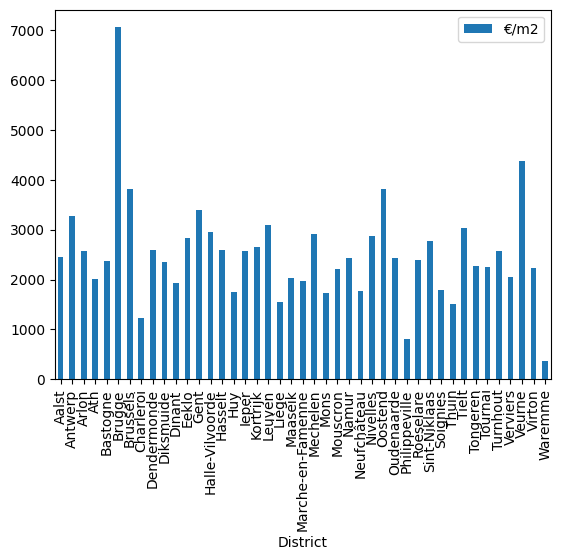

In [67]:
district_price = sale_data.groupby("District",as_index=False)[["Price"]].sum()
district_livingarea = sale_data.groupby("District",as_index=False)[["LivingArea"]].sum()
district_m2_price = pd.merge(district_price,district_livingarea,on="District")
district_m2_price["€/m2"] = district_m2_price["Price"] / district_m2_price["LivingArea"]
district_m2_price.plot.bar(x="District",y="€/m2")

In [68]:
sale_data.head(1)

,Url,BathroomCount,BedroomCount,ConstructionYear,Country,District,Fireplace,FloodingZone,Furnished,Garden,GardenArea,Kitchen,LivingArea,Locality,MonthlyCharges,NumberOfFacades,PEB,PostalCode,Price,PropertyId,Province,Region,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
2,https://www.immoweb.be/en/classified/apartment/for-sale/zeebrugge/8380/10957010,1.0,1,1969.0,Belgium,Brugge,0.0,None,0.0,0.0,0.0,None,29.0,Zeebrugge,NaN,NaN,None,8380,99000,10957010,West Flanders,Flanders,1.0,0.0,GOOD,flat_studio,NaN,0.0,1.0,1.0,2,residential_sale


In [69]:
sale_data.StateOfBuilding.value_counts()

StateOfBuilding
GOOD              37859
AS_NEW            14283
TO_RENOVATE        7311
TO_BE_DONE_UP      5450
JUST_RENOVATED     3908
TO_RESTORE          431
Name: count, dtype: int64

/tmp/ipykernel_13736/26328177.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



<Axes: xlabel='PEB'>

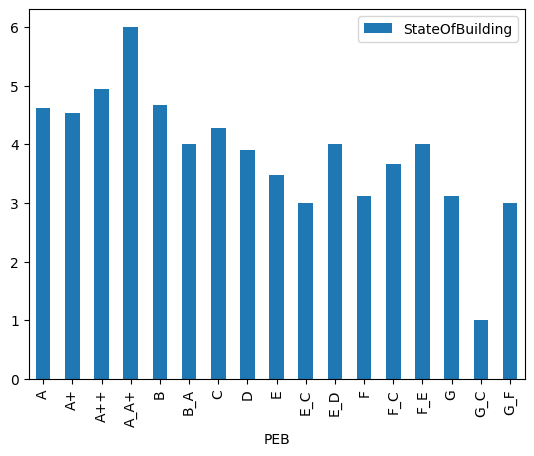

In [70]:
stateofbuilding_dict = {"StateOfBuilding":{"TO_BE_DONE_UP": 1, "TO_RESTORE" : 2, "TO_RENOVATE" : 3, "GOOD" : 4, "JUST_RENOVATED" : 5, "AS_NEW" : 6}}
sale_data.replace(stateofbuilding_dict, inplace=True)
peb_sob = sale_data.groupby("PEB", as_index=False)[["StateOfBuilding"]].mean()
peb_sob.dropna(inplace=True)
peb_sob.sort_values("StateOfBuilding",ascending=False)
peb_sob.plot.bar(x="PEB",y="StateOfBuilding")

# Kitchen test

In [71]:
final_data = sale_data.sample(20000)
final_data.dropna(subset='LivingArea',inplace=True)
final_data["m2"] = final_data["Price"] / final_data["LivingArea"]
final_data = final_data.drop(final_data[final_data.m2 > 15000].index)
fig_kit = px.box(data_frame=final_data, y='m2', x='Kitchen',hover_data=[])
# fig_kit = px.scatter(data_frame=final_data, y='m2', color='Kitchen',title='Spread of the kitchen types according to the price per m². \nN = 10000')

fig_kit.show()
final_data.head()

,Url,BathroomCount,BedroomCount,ConstructionYear,Country,District,Fireplace,FloodingZone,Furnished,Garden,GardenArea,Kitchen,LivingArea,Locality,MonthlyCharges,NumberOfFacades,PEB,PostalCode,Price,PropertyId,Province,Region,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale,m2
118312,https://www.immoweb.be/en/classified/house/for-sale/anzegem/8570/11362971,0.0,0,1966.0,Belgium,Kortrijk,0.0,NON_FLOOD_ZONE,0.0,0.0,0.0,NOT_INSTALLED,100.0,Anzegem,NaN,NaN,F,8570,190000,11362971,West Flanders,Flanders,NaN,NaN,3.0,house,252.0,0.0,0.0,0.0,1,residential_sale,1900.000000
102947,https://www.immoweb.be/en/classified/apartment/for-sale/ans/4430/11215985,1.0,2,2024.0,Belgium,Liège,0.0,NON_FLOOD_ZONE,0.0,0.0,0.0,None,112.0,Ans,NaN,NaN,B,4430,295000,11215985,Liège,Wallonie,NaN,1.0,NaN,apartment,NaN,0.0,1.0,1.0,2,residential_sale,2633.928571
54234,https://www.immoweb.be/en/classified/apartment/for-sale/tessenderlo/3980/20000172,1.0,2,2024.0,Belgium,Hasselt,0.0,None,0.0,0.0,0.0,HYPER_EQUIPPED,88.0,Tessenderlo,NaN,4.0,None,3980,275000,20000172,Limburg,Flanders,NaN,NaN,6.0,apartment,NaN,0.0,1.0,1.0,2,residential_sale,3125.000000
94948,https://www.immoweb.be/en/classified/apartment/for-sale/braine-l-alleud/1420/11281681,1.0,2,2023.0,Belgium,Nivelles,0.0,None,0.0,1.0,35.0,HYPER_EQUIPPED,108.0,Braine-l'Alleud,NaN,4.0,B,1420,373000,11281681,Walloon Brabant,Wallonie,NaN,NaN,NaN,apartment,NaN,0.0,1.0,2.0,2,residential_sale,3453.703704
84787,https://www.immoweb.be/en/classified/house/for-sale/trooz/4870/11415934,1.0,2,1933.0,Belgium,Liège,0.0,POSSIBLE_FLOOD_ZONE,0.0,1.0,1000.0,NOT_INSTALLED,75.0,Trooz,NaN,4.0,G,4870,169000,11415934,Liège,Wallonie,NaN,NaN,3.0,house,1165.0,0.0,1.0,1.0,1,residential_sale,2253.333333


In [72]:
from dash import Dash, html, dash_table, dcc, callback, Output, Input

In [73]:
app = Dash()
app.layout = [
    html.Div(children='Test boutonneux'),
    html.Hr(),
    # dash_table.DataTable(data=sale_data.to_dict('records'), page_size=5),
    dcc.RadioItems(options=['Sort by sale price', 'Sort by rent price'], value='lifeExp', id='controls-and-radio-item'),
    dcc.Graph(figure=fig, id='controls-and-graph')
    ]

In [74]:
@callback(
    Output(component_id='controls-and-graph', component_property='figure'),
    Input(component_id='controls-and-radio-item', component_property='value')
)
def update_graph(col_chosen):
    if 'sale' in col_chosen:
        array = price_sale_district['District']
    else:
        array = price_rent_district['District']
    fig.update_layout(
        xaxis=dict(
                categoryarray=array
            )
    )
    return fig

In [75]:
if __name__ == '__main__':
    app.run(debug=True)

: 